In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import math

from sklearn import datasets

housing = pd.read_csv('/Users/stevendirjayanto/Downloads/housing.csv', header=0)

# Visualize data first
housing.head()
#housing.info()
#housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()
housing.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null float64
total_rooms           20640 non-null float64
total_bedrooms        20433 non-null float64
population            20640 non-null float64
households            20640 non-null float64
median_income         20640 non-null float64
median_house_value    20640 non-null float64
ocean_proximity       20640 non-null object
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x105f30358>,
      dtype=object)

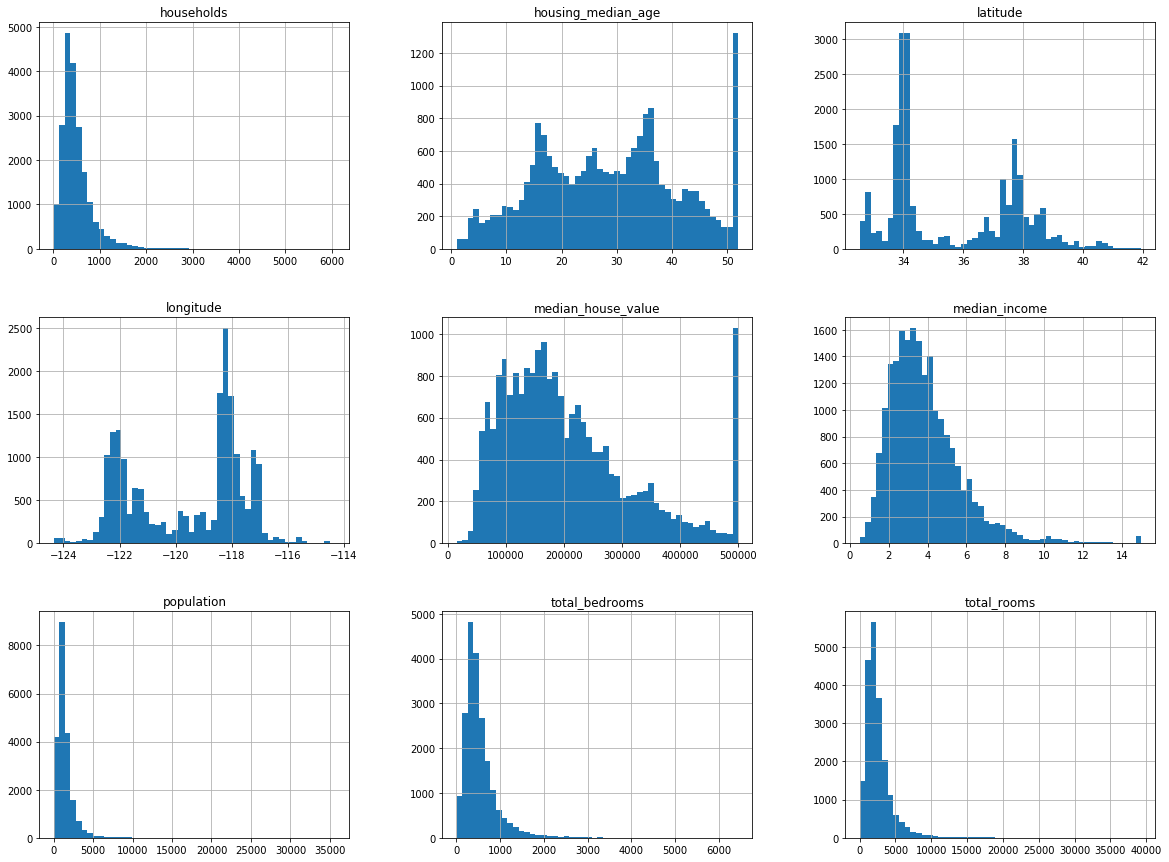

In [4]:
# Plot Histogram
housing.hist(bins=50, figsize=(20,15))

In [5]:
# Create a test set, random sampling (if dataset is large enough)
def split_train_set(data,test_ratio):
    # Shuffles the indices, returns a sequence of integers
    # len gives you the number of rows in the data set
    shuffled_indices = np.random.permutation(len(data))
    # Use int function to return get an integer. This is like typecasting. 
    test_set_size = int(len(data)*test_ratio)
    # testing and training data set
    test_indices = shuffled_indices[:test_set_size]
    train_indeces = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]
    
    

In [2]:
# Feature: median_income. Let's say its a very important feature. 
# When random sampling fail, use this method. 
# To do stratified sampling, we need to make sure that there are not too many strata and each strata has enough
# instances.
# The median income is divided by 1.5 to limit the number of strata. Use ceil to have discrete strata(integer values). 
housing["income_cat"] = np.ceil(housing["median_income"]/1.5)

# Then, keep only the categories(Strata) lower than 5 and combine the rest, since that's where most of the instances are. 
housing["income_cat"].where(housing["income_cat"]<5,5.0, inplace=True)

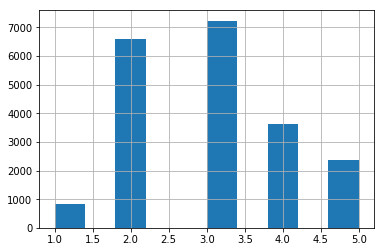

In [3]:
housing["income_cat"].hist()

In [4]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(housing, housing["income_cat"]):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [5]:
# Check the distribution of the stratified data. 
strat_test_set["income_cat"].value_counts()/len(strat_test_set)

3.0    0.350533
2.0    0.318798
4.0    0.176357
5.0    0.114583
1.0    0.039729
Name: income_cat, dtype: float64

Done with creating test and training set. Next: explore the data more in depth. 

In [6]:
# Create a copy of the training set. 
housing_train = strat_train_set.copy()

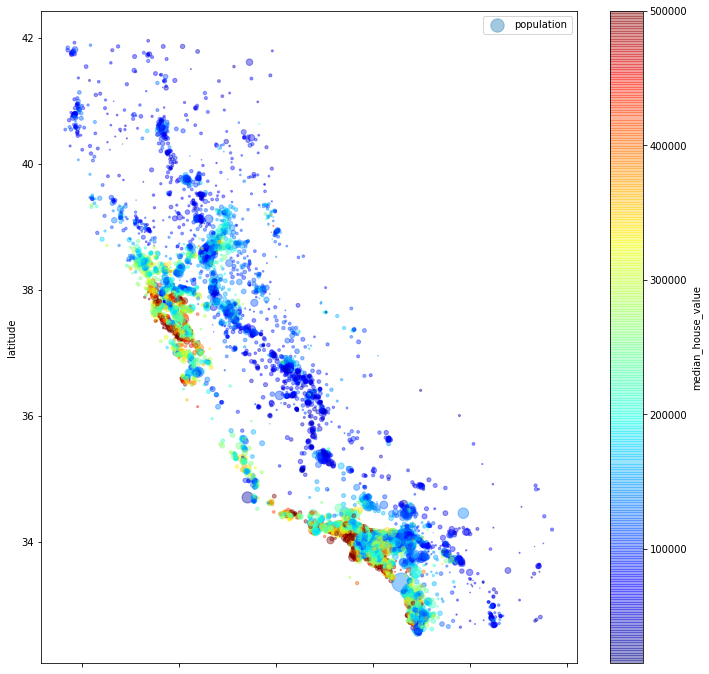

In [7]:
# Visualize geographical data
# Setting the aplpha to 0.1 to see the high density areas. 
housing_train.plot(kind = "scatter", x ="longitude", y ="latitude",alpha=0.4,
                  s=housing_train["population"]/100,label="population",figsize=(12,12),
                  c="median_house_value",cmap=plt.get_cmap("jet"),colorbar=True)
plt.legend()

The above plot shows that house prices are very much related to the location and to the population density. 

In [13]:
# Looking for correlation
corr_matrix = housing_train.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
income_cat            0.642274
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1a1bd400>,
      dtype=object)

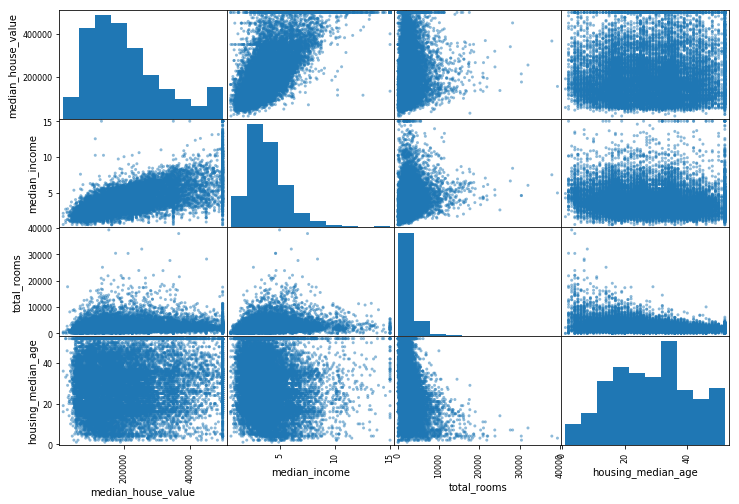

In [16]:
from pandas.plotting import scatter_matrix
attributes = ["median_house_value", "median_income", "total_rooms", "housing_median_age"]
scatter_matrix(housing_train[attributes],figsize=(12,8))

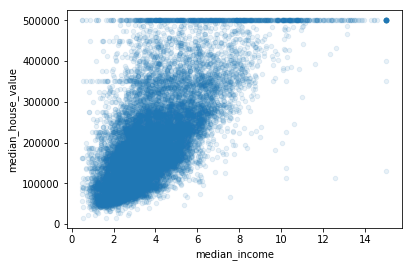

In [18]:
# Median income against median house value seem to have strong correlation, so to look into the plot
housing_train.plot(kind="scatter", x="median_income", y="median_house_value", alpha = 0.1)